In [3]:
import pandas as pd

#### loading the data saved from code1

In [4]:
p = r"all_segment_only_last_week_with12week_test_jan1_2025.csv"
df = pd.read_csv(p)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_1499           30          27        30              4   
2   seg_2242           30          27        30              4   
3   seg_2238           30          27        30              4   
4   seg_2235           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -0.894223                        1.0   
1            -2.886142                        0.0   
2            -2.922880                        0.0   
3            -3.431949                        5.0   
4            -3.524745                        5.0   

   crashcount_binary_sum_12wk_test  
0                                1  
1                                0  
2                                0  
3                                4  
4                                3

In [5]:
df['rank'] = df.groupby(['week_interval'])['cumulative_Prob_log'].rank(method = 'first', ascending=False)

In [6]:
len(df), len(df)/3140

(25120, 8.0)

In [7]:
week_start_list = list(set(df['week_start'].to_list()))
week_start_list

[1, 3, 7, 11, 15, 19, 23, 27]

In [8]:
week_end_list = list(set(df['week_end'].to_list()))
week_end_list

[30]

In [9]:
for a in week_start_list:
    df_filter = df[(df['week_start']==a) & (df['week_end']==30)] 
    df_filter = df_filter.sort_values(by = ['rank'], ascending = True)
    c = 30+1-a
    print(len(df_filter),"- length of df (should be 3140)")
    if len(df_filter)>0:
        
        df_filter.to_csv(f"all_week_combinations_2023/{a}_30_{c}_jan1_2025.csv", index = False)
    else:
        continue
    print("-----------------------------------------------------")

3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------


In [10]:
df_corr = pd.DataFrame()
all_corr = pd.DataFrame( columns = ['start_week', 'end_week', 'week_interval', 'correlation', 'st_error'])

In [11]:
train_start = [1,3,7,11,15,19,23,27]
train_week = [30,28,24,20,16,12,8,4]

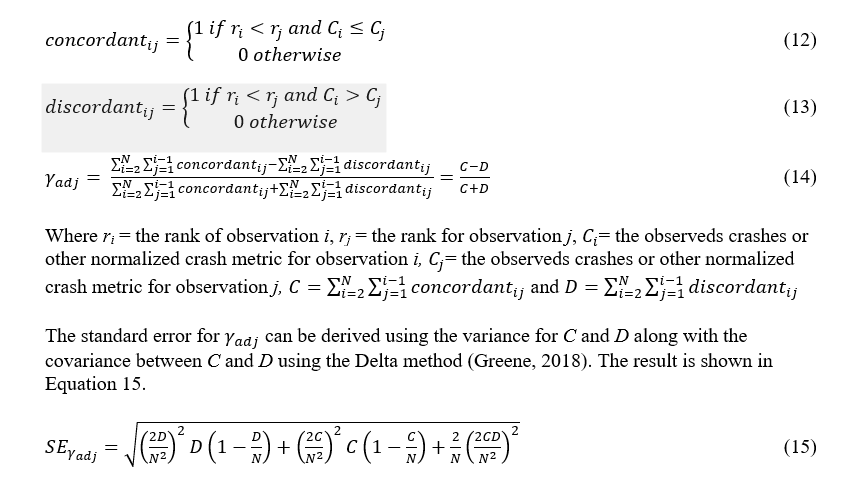

In [12]:
#math.sqrt((((2*D)/(N**2))**2)*D*(1-(D/N)) + (((2*C)/(N**2))**2)*C*(1-(C/N)) + (2/N)*(((2*C*D)/(N**2))**2))

In [13]:
for a,b in zip(train_start,train_week):

    p = r"all_week_combinations_2023/{0}_30_{1}_jan1_2025.csv".format(a,b)
    df = pd.read_csv(p)
    
    df['Num_concord'] = 0
    df['Num_discord'] = 0
    # Iterate through the DataFrame to compare rows
    for index, row in df.iterrows():
        current_value = row['crash_count_sum_12wk_test']
        df1 = df.loc[0:index-1]

        # Count values in 'A' column greater than or equal to the current value
        count_greater_equal = len(df1[df1['crash_count_sum_12wk_test'] >= current_value])

        # Update the 'Count_Greater_Equal' column
        df.at[index, 'Num_concord'] = count_greater_equal
    for index, row in df.iterrows():
        current_value = row['crash_count_sum_12wk_test']
        df1 = df.loc[0:index]

        # Count values in 'A' column greater than or equal to the current value
        count_less = len(df1[df1['crash_count_sum_12wk_test'] < current_value])

        # Update the 'Count_Greater_Equal' column
        df.at[index, 'Num_discord'] = count_less
        
    #calculating correlation    
    #corr = ((df['Num_concord'].sum()-df['Num_discord'].sum())/(df['Num_concord'].sum()+df['Num_discord'].sum()))
    C = df['Num_concord'].sum()
    D = df['Num_discord'].sum()
    N = C+D

    import math
    corr = (C-D)/(C+D)
    SE = math.sqrt((((2*D)/(N**2))**2)*D*(1-(D/N)) + (((2*C)/(N**2))**2)*C*(1-(C/N)) + (2/N)*(((2*C*D)/(N**2))**2))

  
    # Create a row as a dictionary
    df_corr_row = {'start_week': a, 'end_week': 30, 'week_interval': 30-a+1, 'correlation': corr, 'st_error': SE}

    # Append the row to 'all_corr' DataFrame
    all_corr = all_corr._append(df_corr_row, ignore_index=True)
    print("correlation for week", a,b, "is", corr)
    print("st error for week", a,b, "is", SE)



C:\Users\maroa\AppData\Local\Temp\ipykernel_54212\2342491400.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_corr = all_corr._append(df_corr_row, ignore_index=True)


correlation for week 1 30 is 0.806753337405113
st error for week 1 30 is 0.0002661705180714588
correlation for week 3 28 is 0.8066746073133763
st error for week 3 28 is 0.00026621893195523567
correlation for week 7 24 is 0.8063669918003016
st error for week 7 24 is 0.00026640796587421966
correlation for week 11 20 is 0.8066307781901413
st error for week 11 20 is 0.0002662458781526608
correlation for week 15 16 is 0.8051393705245088
st error for week 15 16 is 0.0002671603081463858
correlation for week 19 12 is 0.803729127901904
st error for week 19 12 is 0.0002680205545019816
correlation for week 23 8 is 0.8031248541565633
st error for week 23 8 is 0.0002683878567541539
correlation for week 27 4 is 0.8037344036297007
st error for week 27 4 is 0.0002680173442653618


In [14]:
# total 137 correlations
all_corr

start_week  end_week  week_interval  correlation  st_error
0         1.0      30.0           30.0     0.806753  0.000266
1         3.0      30.0           28.0     0.806675  0.000266
2         7.0      30.0           24.0     0.806367  0.000266
3        11.0      30.0           20.0     0.806631  0.000266
4        15.0      30.0           16.0     0.805139  0.000267
5        19.0      30.0           12.0     0.803729  0.000268
6        23.0      30.0            8.0     0.803125  0.000268
7        27.0      30.0            4.0     0.803734  0.000268

In [15]:
all_corr = all_corr.sort_values(by = ['correlation'], ascending = False)
all_corr

start_week  end_week  week_interval  correlation  st_error
0         1.0      30.0           30.0     0.806753  0.000266
1         3.0      30.0           28.0     0.806675  0.000266
3        11.0      30.0           20.0     0.806631  0.000266
2         7.0      30.0           24.0     0.806367  0.000266
4        15.0      30.0           16.0     0.805139  0.000267
7        27.0      30.0            4.0     0.803734  0.000268
5        19.0      30.0           12.0     0.803729  0.000268
6        23.0      30.0            8.0     0.803125  0.000268

In [16]:
all_corr.to_csv("correlation_lastweeks_8_combination_jan2_2025.csv", index = False)

### for binary crash count sum (added later)

In [17]:
import pandas as pd

In [18]:
df_corr = pd.DataFrame()
all_corr = pd.DataFrame( columns = ['start_week', 'end_week', 'week_interval', 'correlation', 'st_error'])

In [19]:
train_start = [1,3,7,11,15,19,23,27]
train_week = [30,28,24,20,16,12,8,4]

In [20]:
for a,b in zip(train_start,train_week):

    p = r"all_week_combinations_2023/{0}_30_{1}_jan1_2025.csv".format(a,b)
    df = pd.read_csv(p)
    
    df['Num_concord'] = 0
    df['Num_discord'] = 0
    # Iterate through the DataFrame to compare rows
    for index, row in df.iterrows():
        current_value = row['crashcount_binary_sum_12wk_test']
        df1 = df.loc[0:index-1]

        # Count values in 'A' column greater than or equal to the current value
        count_greater_equal = len(df1[df1['crashcount_binary_sum_12wk_test'] >= current_value])

        # Update the 'Count_Greater_Equal' column
        df.at[index, 'Num_concord'] = count_greater_equal
    for index, row in df.iterrows():
        current_value = row['crashcount_binary_sum_12wk_test']
        df1 = df.loc[0:index]

        # Count values in 'A' column greater than or equal to the current value
        count_less = len(df1[df1['crashcount_binary_sum_12wk_test'] < current_value])

        # Update the 'Count_Greater_Equal' column
        df.at[index, 'Num_discord'] = count_less
        
    #calculating correlation    
    #corr = ((df['Num_concord'].sum()-df['Num_discord'].sum())/(df['Num_concord'].sum()+df['Num_discord'].sum()))
    C = df['Num_concord'].sum()
    D = df['Num_discord'].sum()
    N = C+D

    import math
    corr = (C-D)/(C+D)
    SE = math.sqrt((((2*D)/(N**2))**2)*D*(1-(D/N)) + (((2*C)/(N**2))**2)*C*(1-(C/N)) + (2/N)*(((2*C*D)/(N**2))**2))

  
    # Create a row as a dictionary
    df_corr_row = {'start_week': a, 'end_week': 30, 'week_interval': 30-a+1, 'correlation': corr, 'st_error': SE}

    # Append the row to 'all_corr' DataFrame
    all_corr = all_corr._append(df_corr_row, ignore_index=True)
    print("correlation for week (binary sum)", a,b, "is", corr)
    print("st error for week", a,b, "is", SE)



C:\Users\maroa\AppData\Local\Temp\ipykernel_54212\2876897308.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_corr = all_corr._append(df_corr_row, ignore_index=True)


correlation for week (binary sum) 1 30 is 0.8071895995113865
st error for week 1 30 is 0.00026590199978221077
correlation for week (binary sum) 3 28 is 0.807105999517068
st error for week 3 28 is 0.00026595348762521325
correlation for week (binary sum) 7 24 is 0.8067902674996905
st error for week 7 24 is 0.000266147803803556
correlation for week (binary sum) 11 20 is 0.8070962597119047
st error for week 11 20 is 0.0002659594852137739
correlation for week (binary sum) 15 16 is 0.8055979530176148
st error for week 15 16 is 0.0002668796501168333
correlation for week (binary sum) 19 12 is 0.8041653900081773
st error for week 19 12 is 0.0002677548913801366
correlation for week (binary sum) 23 8 is 0.8035270269447652
st error for week 23 8 is 0.00026814348646483026
correlation for week (binary sum) 27 4 is 0.8042445259251293
st error for week 27 4 is 0.0002677066576196266


In [21]:
all_corr

start_week  end_week  week_interval  correlation  st_error
0         1.0      30.0           30.0     0.807190  0.000266
1         3.0      30.0           28.0     0.807106  0.000266
2         7.0      30.0           24.0     0.806790  0.000266
3        11.0      30.0           20.0     0.807096  0.000266
4        15.0      30.0           16.0     0.805598  0.000267
5        19.0      30.0           12.0     0.804165  0.000268
6        23.0      30.0            8.0     0.803527  0.000268
7        27.0      30.0            4.0     0.804245  0.000268

In [22]:
all_corr = all_corr.sort_values(by = ['correlation'], ascending = False)
all_corr

start_week  end_week  week_interval  correlation  st_error
0         1.0      30.0           30.0     0.807190  0.000266
1         3.0      30.0           28.0     0.807106  0.000266
3        11.0      30.0           20.0     0.807096  0.000266
2         7.0      30.0           24.0     0.806790  0.000266
4        15.0      30.0           16.0     0.805598  0.000267
7        27.0      30.0            4.0     0.804245  0.000268
5        19.0      30.0           12.0     0.804165  0.000268
6        23.0      30.0            8.0     0.803527  0.000268

In [23]:
all_corr.to_csv("correlation_lastweeks_8_combination_binary_sum_april21_2025.csv", index = False)